**LINEAR REGRESSION**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Mean Squared Error: 0.71


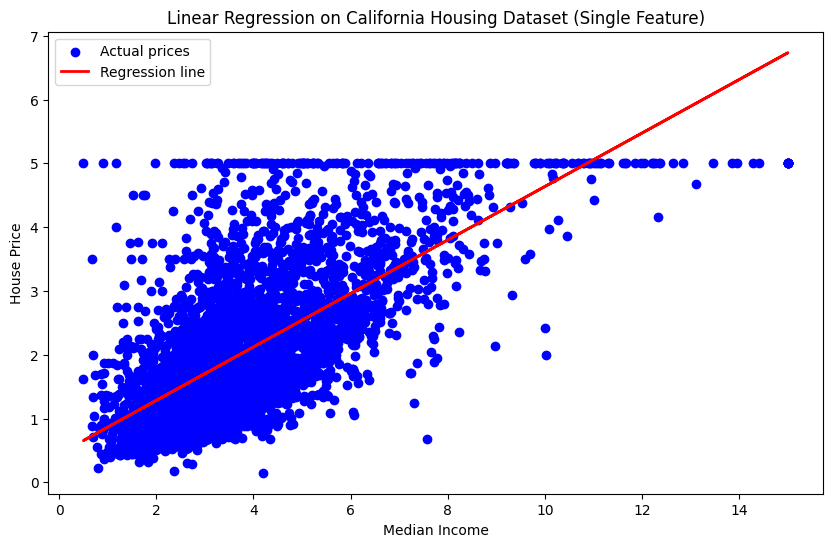

In [3]:


# Load the dataset
california = fetch_california_housing()
X = california.data[:, 0].reshape(-1, 1)  # Use 'MedInc' (median income) as the feature
y = california.target  # Target variable (house prices)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of the test data
plt.scatter(X_test, y_test, color='blue', label='Actual prices')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('Linear Regression on California Housing Dataset (Single Feature)')
plt.legend()

# Show the plot
plt.show()


**CLASSIFICATION**

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


C:\Users\3122215002012\AppData\Local\Temp\ipykernel_3360\823068577.py:62: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label='Testing data')


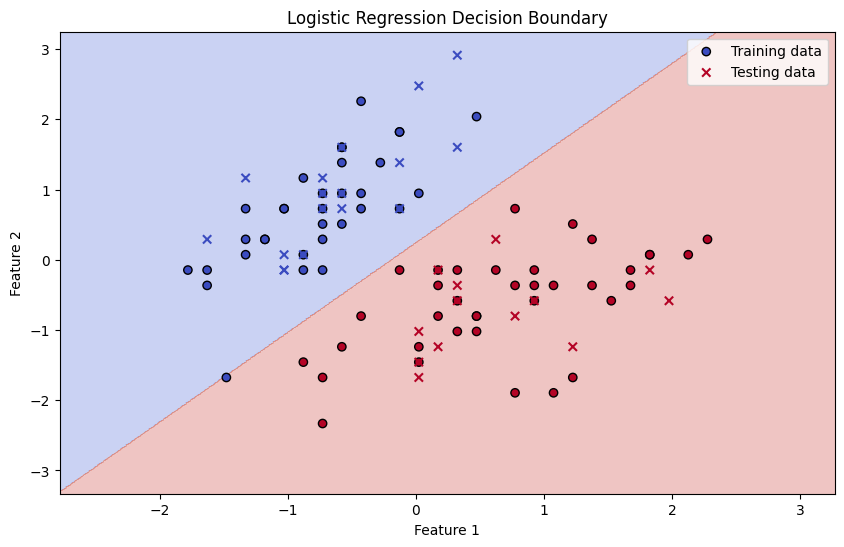

In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select only two classes (0 and 1) for binary classification
binary_indices = y != 2
X_binary = X[binary_indices]
y_binary = y[binary_indices]

# Use only the first two features for visualization purposes
X_binary = X_binary[:, :2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Visualization of decision boundaries
plt.figure(figsize=(10, 6))

# Create a mesh grid for plotting
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class probabilities for the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm, marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label='Testing data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


**KNN**

In [7]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


Accuracy with k=1: 0.98
Accuracy with k=3: 0.99
Accuracy with k=5: 0.99
Accuracy with k=7: 0.99
Accuracy with k=10: 0.98


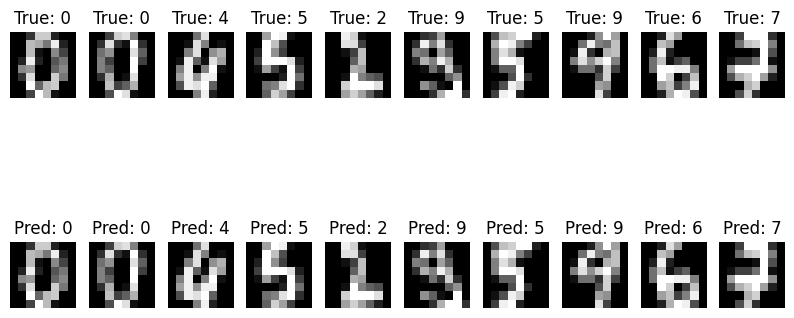

In [8]:
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Experiment with different values of k
k_values = [1, 3, 5, 7, 10]
for k in k_values:
    # Initialize and train KNN
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with k={k}: {accuracy:.2f}")

# Optional: Visualize some test results
def plot_digits(images, labels, predictions, num=10):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(2, num, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f'True: {labels[i]}')
        plt.axis('off')
        plt.subplot(2, num, num + i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(f'Pred: {predictions[i]}')
        plt.axis('off')
    plt.show()

# Predict and visualize a subset of test data
sample_indices = np.random.choice(len(X_test), size=10, replace=False)
X_sample = X_test[sample_indices]
y_true = y_test[sample_indices]
y_pred = knn.predict(X_sample)

plot_digits(X_sample, y_true, y_pred)


**DECISION TREE CLASSIFICATION**

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


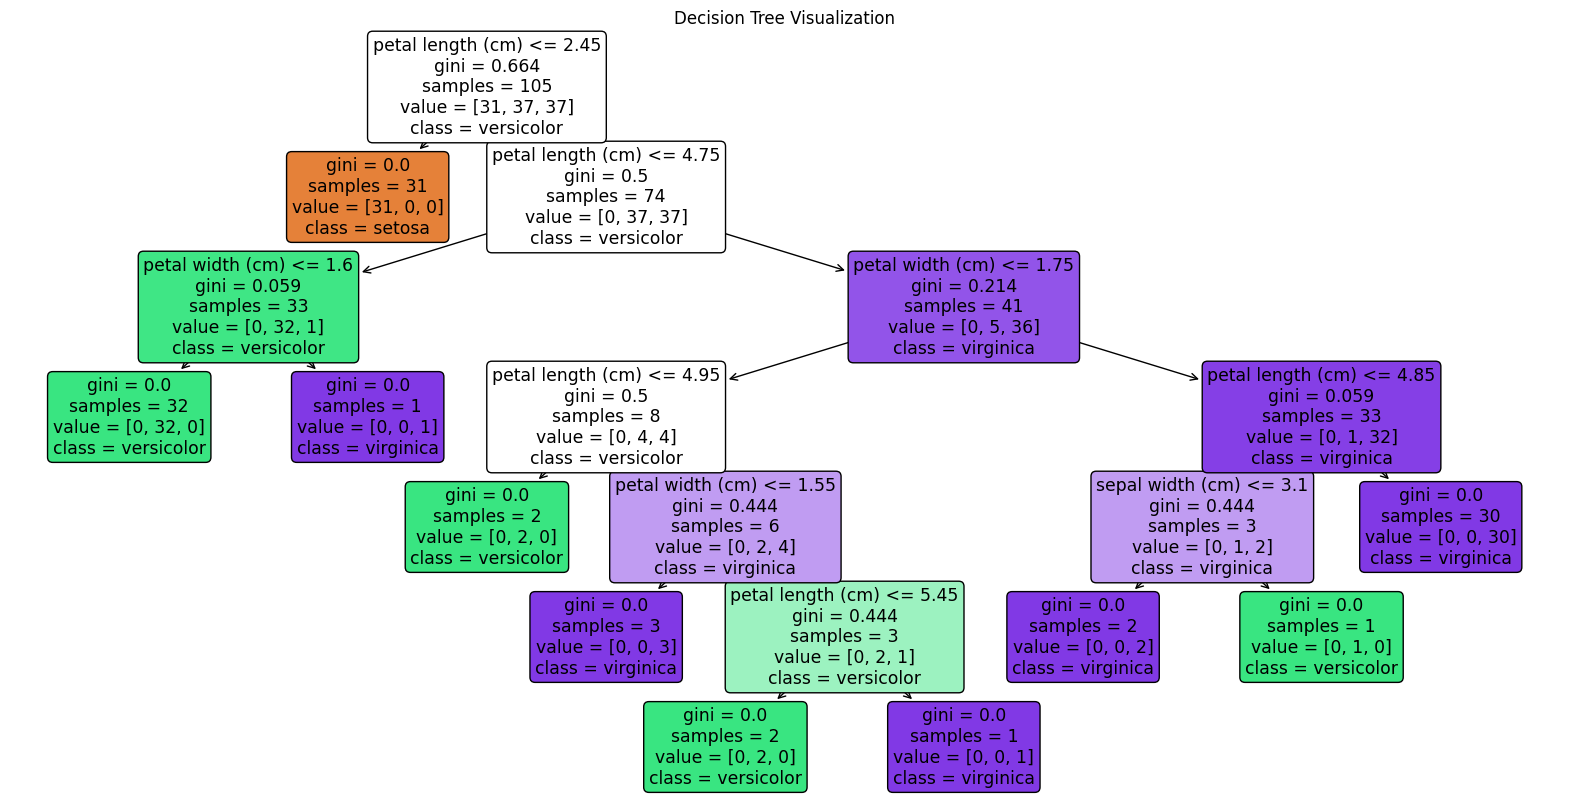

In [8]:
# Plot the tree structure
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,filled=True,rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


Feature ranking:
1. feature petal length (cm) (0.8932635518001373)
2. feature petal width (cm) (0.08762642908984374)
3. feature sepal width (cm) (0.01911001911001911)
4. feature sepal length (cm) (0.0)


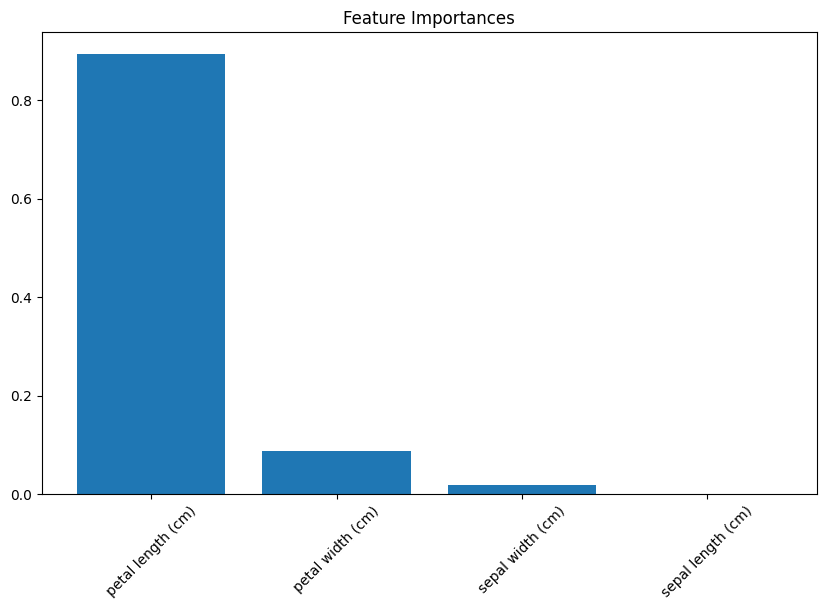

In [21]:
import numpy as np

# Get feature importances
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature importances
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {iris.feature_names[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=45)
#plt.xlim([-1, X.shape[1]])
plt.show()


**NAIVE BAYES CLASSIFICATION**

In [23]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

# Load dataset (for demonstration, using 20 newsgroups dataset)
# In practice, replace this with a spam SMS dataset
data = fetch_20newsgroups()
X = data.data
y = data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Initialize and train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       135
           1       0.72      0.80      0.76       166
           2       0.77      0.75      0.76       170
           3       0.70      0.75      0.73       182
           4       0.84      0.74      0.79       183
           5       0.82      0.89      0.85       169
           6       0.75      0.84      0.79       172
           7       0.83      0.89      0.86       191
           8       0.89      0.88      0.89       198
           9       0.89      0.95      0.92       168
          10       0.92      0.95      0.94       163
          11       0.99      0.92      0.95       195
          12       0.82      0.72      0.77       177
          13       0.93      0.90      0.92       172
          14       0.90      0.92      0.91       176
          15       0.72      0.94      0.81       182
          16       0.87      0.95      0.91

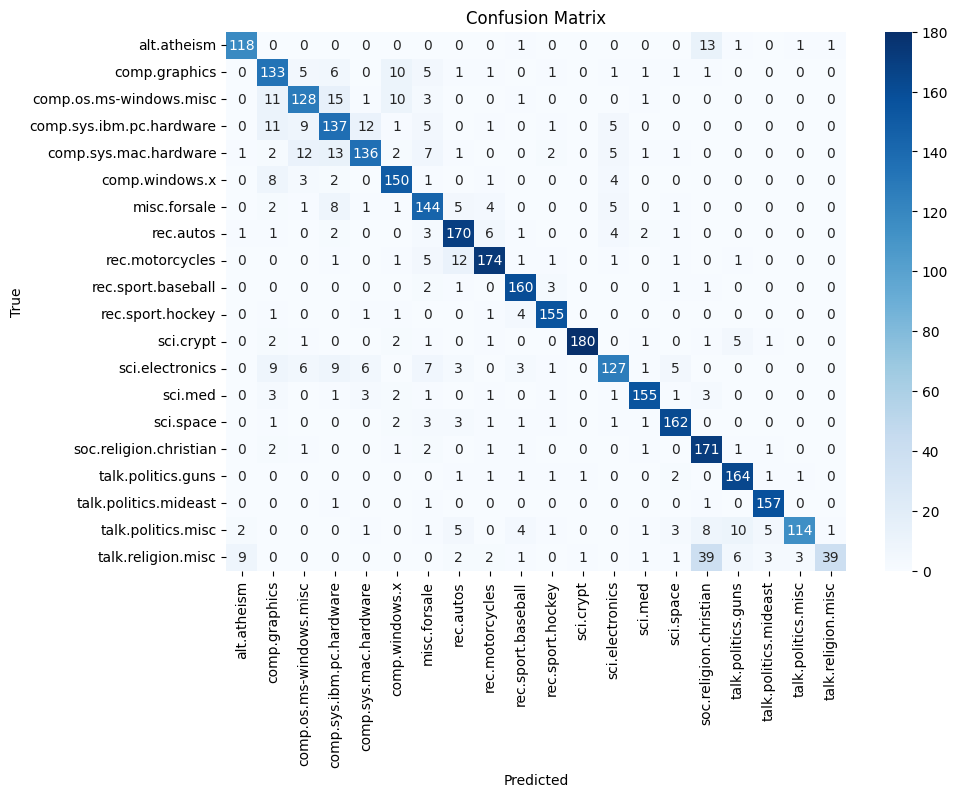

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**SUPPPORT VECTOR MACHINE**


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate the dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
from sklearn.svm import SVC

# Initialize the SVM models with different kernels
svm_linear = SVC(kernel='linear', C=1.0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)

# Train the models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)


SVC()

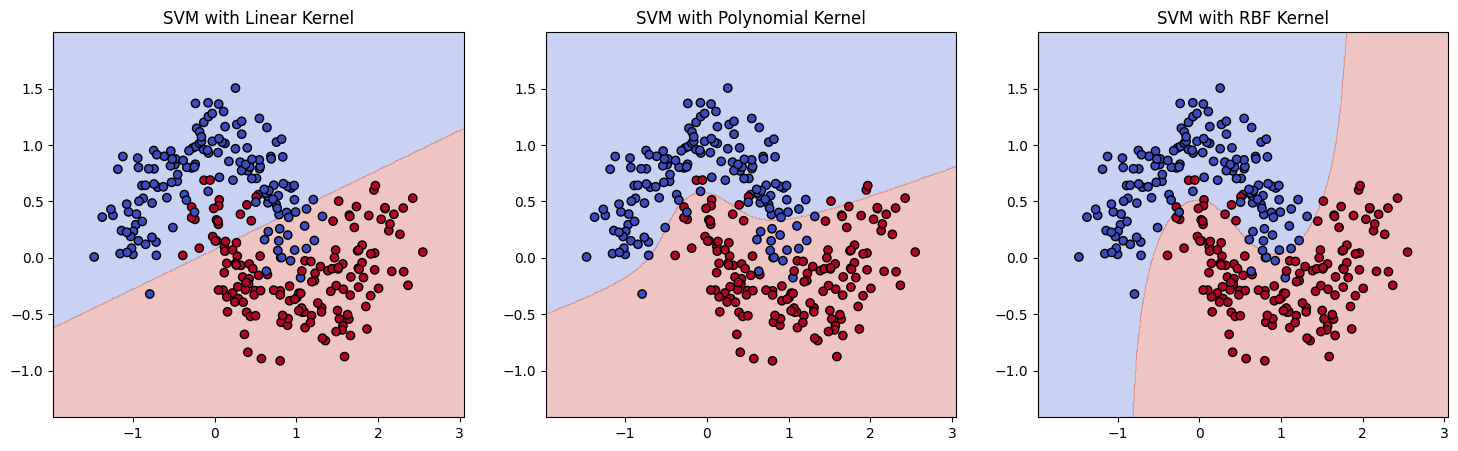

In [19]:
def plot_decision_boundary(clf, X, y, title, ax):
    # Define the grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict on the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    ax.set_title(title)

# Create a plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(svm_linear, X, y, 'SVM with Linear Kernel', axes[0])
plot_decision_boundary(svm_poly, X, y, 'SVM with Polynomial Kernel', axes[1])
plot_decision_boundary(svm_rbf, X, y, 'SVM with RBF Kernel', axes[2])

plt.show()
